In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import GroupKFold

import warnings
warnings.filterwarnings("ignore")

2023-06-09 12:02:47.170126: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 12:02:47.203813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 12:02:47.204923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 12:02:48.024851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = pd.read_csv("../DateDatasets/dataset.csv").drop(columns=["Unnamed: 0"])

In [3]:
cols = ["StationEnd", "WorkingDay", "Hour", "Count", "Count1", "Count1week", "Count2week", "Count3week", "Temp", "ATemp"]

epochs = 30
batch_size = 1
verbose = 2

In [4]:
met1 = dataset[[col for col in dataset.columns if col in cols]]

X = met1.drop(columns=["Count"])
y = met1["Count"]

X = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))

# Define the K-fold Cross Validator
kfold = GroupKFold(n_splits=10)

acc_per_fold = []
loss_per_fold = []

model_met1 = Sequential()
model_met1.add(LSTM(4, input_shape=(1,met1.shape[1]-1)))
model_met1.add(Dense(1))
model_met1.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X, y, dataset["Day"]):
    model_met1.fit(X[train], y[train], epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Generate generalization metrics
    scores = model_met1.evaluate(X[test], y[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

2023-06-09 17:56:59.845700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-09 17:56:59.846898: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30


2023-06-09 17:57:00.334318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 17:57:00.335695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 17:57:00.336498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

183178/183178 - 165s - loss: 4.1516 - accuracy: 0.3327 - 165s/epoch - 902us/step
Epoch 2/30
183178/183178 - 151s - loss: 3.8703 - accuracy: 0.3337 - 151s/epoch - 826us/step
Epoch 3/30
183178/183178 - 152s - loss: 3.8373 - accuracy: 0.3336 - 152s/epoch - 832us/step
Epoch 4/30
183178/183178 - 152s - loss: 3.7923 - accuracy: 0.3333 - 152s/epoch - 831us/step
Epoch 5/30
183178/183178 - 153s - loss: 3.7563 - accuracy: 0.3329 - 153s/epoch - 833us/step
Epoch 6/30
183178/183178 - 153s - loss: 3.7421 - accuracy: 0.3327 - 153s/epoch - 834us/step
Epoch 7/30
183178/183178 - 153s - loss: 3.7345 - accuracy: 0.3326 - 153s/epoch - 837us/step
Epoch 8/30
183178/183178 - 153s - loss: 3.7229 - accuracy: 0.3325 - 153s/epoch - 834us/step
Epoch 9/30
183178/183178 - 153s - loss: 3.7245 - accuracy: 0.3325 - 153s/epoch - 833us/step
Epoch 10/30
183178/183178 - 153s - loss: 3.7208 - accuracy: 0.3325 - 153s/epoch - 834us/step
Epoch 11/30
183178/183178 - 153s - loss: 3.7153 - accuracy: 0.3324 - 153s/epoch - 835us/st

2023-06-09 19:13:38.123868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:13:38.124991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:13:38.125855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30
183010/183010 - 155s - loss: 3.6649 - accuracy: 0.3322 - 155s/epoch - 847us/step
Epoch 2/30
183010/183010 - 155s - loss: 3.6666 - accuracy: 0.3324 - 155s/epoch - 847us/step
Epoch 3/30
183010/183010 - 155s - loss: 3.6613 - accuracy: 0.3324 - 155s/epoch - 847us/step
Epoch 4/30
183010/183010 - 155s - loss: 3.6628 - accuracy: 0.3323 - 155s/epoch - 847us/step
Epoch 5/30
183010/183010 - 155s - loss: 3.6693 - accuracy: 0.3324 - 155s/epoch - 846us/step
Epoch 6/30
183010/183010 - 155s - loss: 3.6668 - accuracy: 0.3324 - 155s/epoch - 845us/step
Epoch 7/30
183010/183010 - 155s - loss: 3.6579 - accuracy: 0.3323 - 155s/epoch - 846us/step
Epoch 8/30
183010/183010 - 155s - loss: 3.6625 - accuracy: 0.3323 - 155s/epoch - 846us/step
Epoch 9/30
183010/183010 - 155s - loss: 3.6612 - accuracy: 0.3324 - 155s/epoch - 846us/step
Epoch 10/30
183010/183010 - 155s - loss: 3.6585 - accuracy: 0.3323 - 155s/epoch - 846us/step
Epoch 11/30
183010/183010 - 155s - loss: 3.6572 - accuracy: 0.3323 - 155s/epoch

Text(0.5, 0, 'Methods')

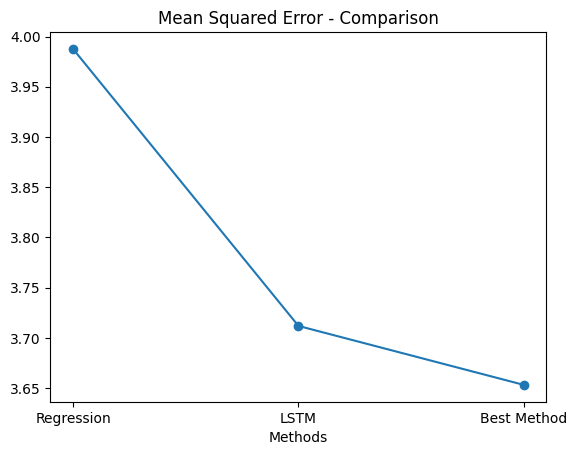

In [5]:
plt.plot(["Regression", "LSTM", "Best Method"], [3.9876557741635343, 3.7118978261947633, 3.6531880855560304], marker="o")
plt.title("Mean Squared Error - Comparison")
plt.xlabel("Methods")